# Chapter 14 - The Random Forest

## Listing 14-1. Importing the data

In [1]:
import pandas as pd
data = pd.read_csv('Ch05_Sunspots_database.csv')
data = data.iloc[:,[1,2]]


FileNotFoundError: [Errno 2] No such file or directory: 'Ch05_Sunspots_database.csv'

## Listing 14-2. Feature engineering

In [2]:
# Seasonality variables
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].apply(lambda x: x.year)
data['Month'] = data['Date'].apply(lambda x: x.month)

# Adding a year of lagged data
data['L1'] = data['Monthly Mean Total Sunspot Number'].shift(1)
data['L2'] = data['Monthly Mean Total Sunspot Number'].shift(2)
data['L3'] = data['Monthly Mean Total Sunspot Number'].shift(3)
data['L4'] = data['Monthly Mean Total Sunspot Number'].shift(4)
data['L5'] = data['Monthly Mean Total Sunspot Number'].shift(5)
data['L6'] = data['Monthly Mean Total Sunspot Number'].shift(6)
data['L7'] = data['Monthly Mean Total Sunspot Number'].shift(7)
data['L8'] = data['Monthly Mean Total Sunspot Number'].shift(8)
data['L9'] = data['Monthly Mean Total Sunspot Number'].shift(9)
data['L10'] = data['Monthly Mean Total Sunspot Number'].shift(10)
data['L11'] = data['Monthly Mean Total Sunspot Number'].shift(11)
data['L12'] = data['Monthly Mean Total Sunspot Number'].shift(12)


## Listing 14-3. Fitting the default Random Forest Regressor

In [3]:
# Create X and y object
data = data.dropna()
y = data['Monthly Mean Total Sunspot Number']
X = data[['Year', 'Month', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12']]

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12345, shuffle=False)

from sklearn.ensemble import RandomForestRegressor
my_rf = RandomForestRegressor()
my_rf.fit(X_train, y_train)
fcst = my_rf.predict(X_test)

from sklearn.metrics import r2_score
r2_score(list(y_test), list(fcst))


0.8618443779471716

## Listing 14-4. Fitting the Random Forest Regressor with hyperparameter tuning

In [4]:
from sklearn.model_selection import GridSearchCV

my_rf = GridSearchCV(RandomForestRegressor(), 
                 {'max_features':[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],
                 'n_estimators': [10, 50, 100, 250, 500, 750, 1000]},
                scoring = 'r2', n_jobs = -1)

my_rf.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)


0.8669806273406019
{'max_features': 0.65, 'n_estimators': 750}


## Listing 14-5. Obtaining the plot of the forecast on the test data

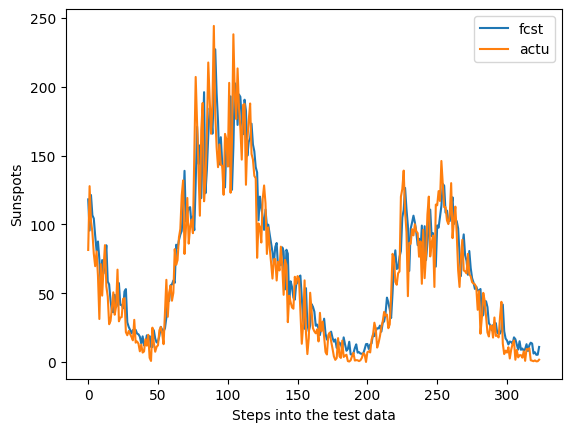

In [5]:
import matplotlib.pyplot as plt
plt.plot(list(fcst))
plt.plot(list(y_test))
plt.legend(['fcst', 'actu'])
plt.ylabel('Sunspots')
plt.xlabel('Steps into the test data')
plt.show()


## Listing 14-6. Testing out a normal distribution for the max_features

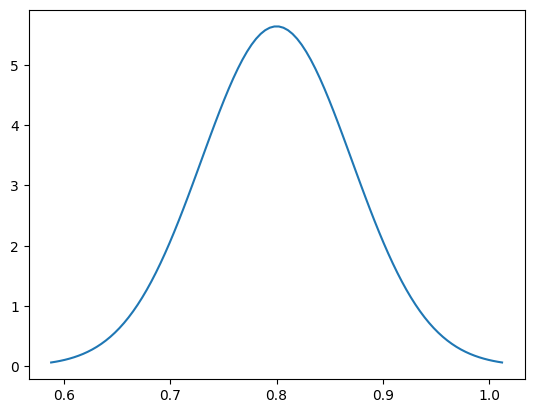

In [6]:
import numpy as np
import scipy.stats as stats
import math

mu = 0.8
variance = 0.005
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()


## Listing 14-7. Testing out a uniform distribution for the n_estimators

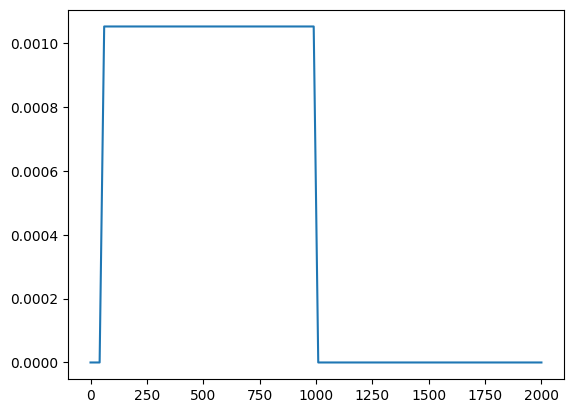

In [7]:
x = np.linspace(0, 2000, 100)
plt.plot(x, stats.uniform.pdf(x, 50, 950))
plt.show()


## Listing 14-8. RandomizedSearchCv with two distributions

In [8]:
from sklearn.model_selection import RandomizedSearchCV

# Specifying the distributions to draw from
distributions = {
    'max_features': stats.norm(0.8, math.sqrt(0.005)),
    'n_estimators': stats.randint(50, 1000)
}

# Creating the search
my_rf = RandomizedSearchCV(RandomForestRegressor(),
                           
                     distributions, n_iter=10,
                          scoring = 'r2',
                          n_jobs = -1,
                          random_state = 12345)

# Fitting the search
my_rf.fit(X_train, y_train)

# Printing the results
print(r2_score(list(y_test), list(my_rf.predict(X_test))))
print(my_rf.best_params_)


0.8665156083703982
{'max_features': 0.8547435817352691, 'n_estimators': 317}


## Listing 14-9.Feature Importances

C:\Users\ALBER\AppData\Local\Temp\ipykernel_21596\324892703.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=fi_sorted,


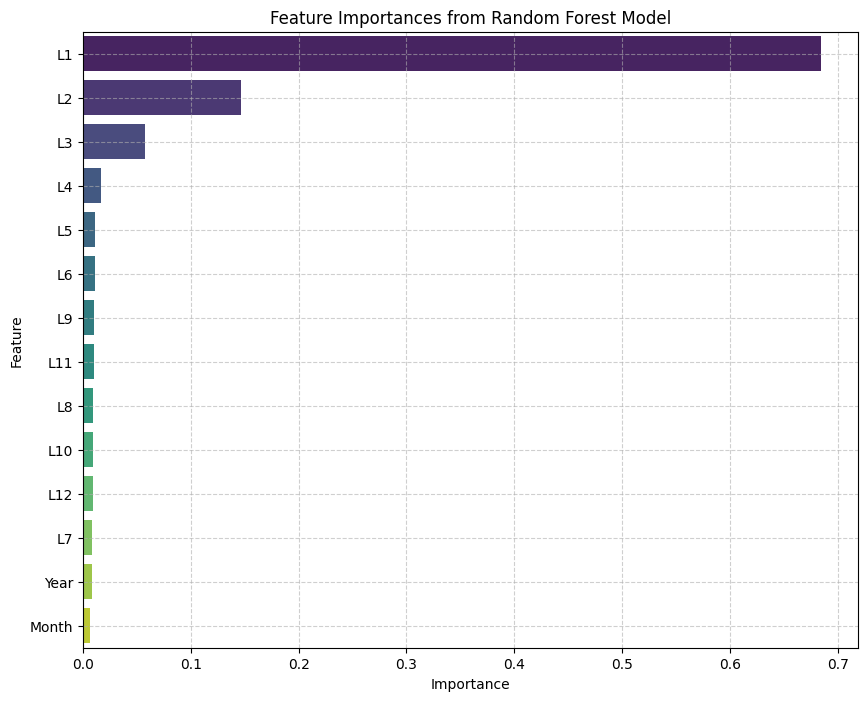

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train and my_rf are already defined in your context

# Create DataFrame of feature importances
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': my_rf.best_estimator_.feature_importances_
})

# Sort the DataFrame by importance in descending order
fi_sorted = fi.sort_values('importance', ascending=False)

# Initialize the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a fancy bar plot using seaborn
sns.barplot(x='importance', y='feature', data=fi_sorted,
            palette='viridis')  # 'viridis' is a visually appealing colormap

# Add labels and title for clarity
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest Model')

# Optional: add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()
